# Dataset
We are going to use the following dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [23]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load de Dataset

In [24]:
df = pd.read_csv('../../datasets/bank_marketing/bank-additional/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


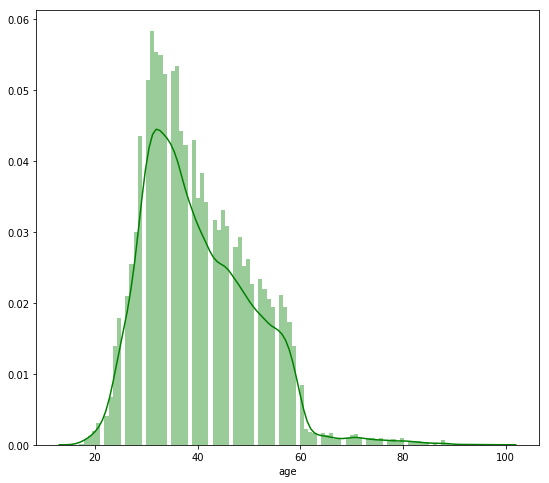

In [25]:
print(df['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

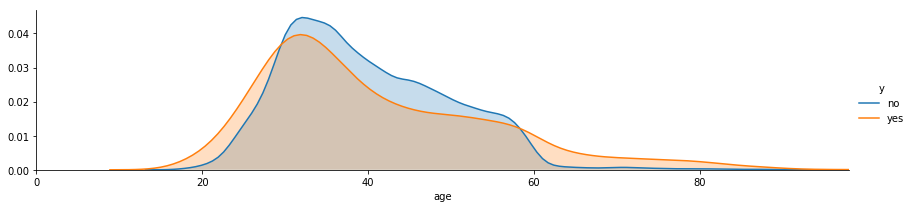

In [20]:
# Plot distributions of the age of the customers  
a = sns.FacetGrid( df, hue = 'y', aspect=4 )
a.map(sns.kdeplot, 'age', shade= True )
a.set(xlim=(0 , df['age'].max()))
a.add_legend()

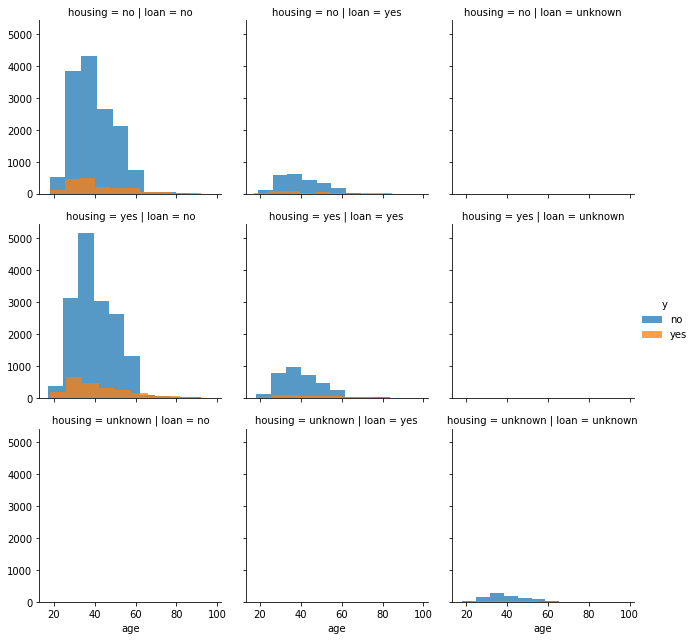

In [26]:
# Histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(df, row = 'housing', col = 'loan', hue = 'y')
h.map(plt.hist, 'age', alpha = .75)
h.add_legend()

In [11]:
df_numeric = df.select_dtypes(include = ['float64', 'int64'])
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


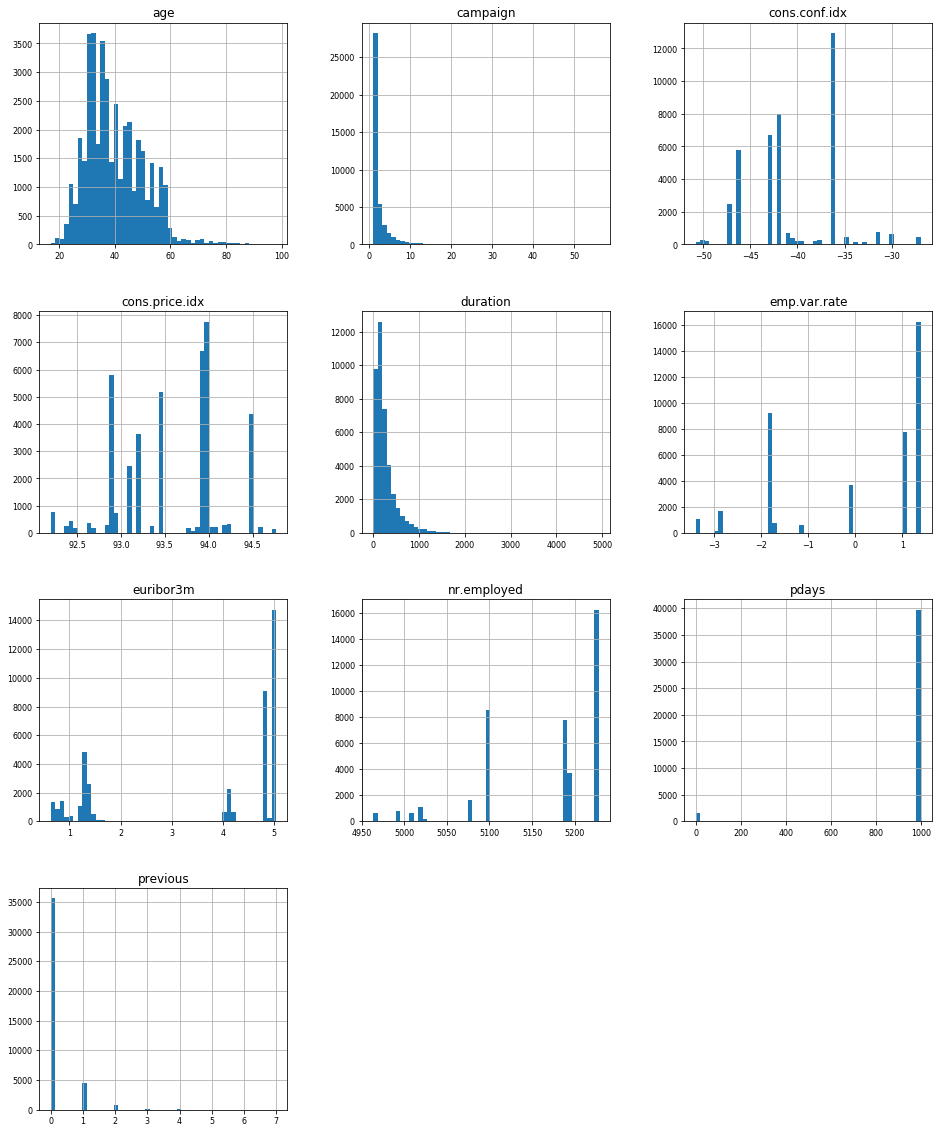

In [12]:
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [14]:
# Converting dependent variable categorical to dummy
y = pd.get_dummies(df['y'], columns = ['y'], drop_first = True)
yA = y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FDB3FE4A8>]],
      dtype=object)

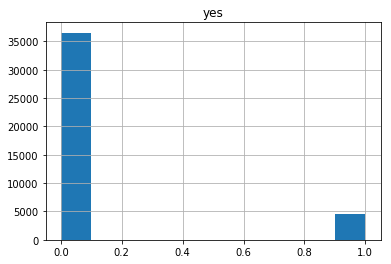

In [16]:
y.hist()

In [68]:
import logging
#logging.basicConfig(filename='app.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')

class MLDataSet():

    def __init__(self, df, target):
        self.target = target
        self.df = df
        logger = logging.getLogger()
        logger.setLevel(logging.DEBUG)
        logging.debug('Start')
        print('Start')
        
    def isBalanced(self):
        print("Target: " + str(self.df[self.target].value_counts().to_frame()))
        
#    def columnTypes(self):
#        return null
        
#    def missingValues(self):

    def encodeTarget(self):
        if self.df[self.target].dtype.name == 'object':
            targetCol = pd.get_dummies(self.df[self.target], columns = [self.target], drop_first = True)
            df[self.target] = targetCol
        else:
            print('The target is not categorical: '+self.target + ' is ' + self.df[self.target].dtype.name)

    def getDataFrame(self):
        return self.df
        
    def getData(self):
        return self.df.loc[:, self.df.columns != self.target]
    
        
    def getTarget(self):
        return self.df[self.target]
          

In [69]:
mlds = MLDataSet(df,'y')
mlds.isBalanced()

Start
Target:        y
0  36548
1   4640


In [77]:
class MLChart():

    def __init__(self, MLDataSet):
        self.ds = MLDataSet
        
    def distributionTarget(self, column):
        a = sns.FacetGrid( self.ds.df, hue = self.ds.target, aspect=4 )
        a.map(sns.kdeplot, column, shade= True )
        a.set(xlim=(0 , self.ds.df[column].max()))
        a.add_legend()        


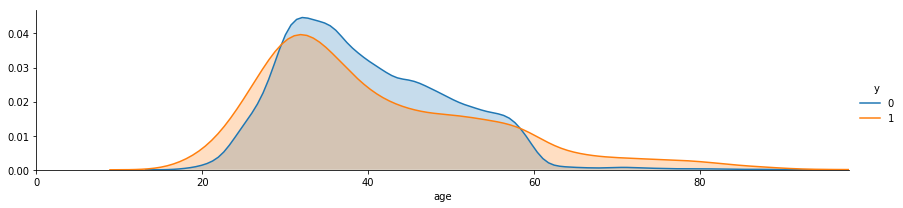

In [78]:
chart = MLChart(mlds)
chart.distributionTarget('age')

In [64]:
mlds.encodeTarget()
mlds.getDataFrame().head()

The target is not categorical: y is uint8


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [65]:
mlds.getData()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
